# 🎯 Customer Churn Prediction – Machine Learning Project

## 📌 Problem Statement

Customer churn prediction is a critical task in the business and telecom industry.  
This project aims to build a machine learning model that can predict whether a customer is likely to leave the company (churn) based on their demographic, service, and billing information.

By identifying customers who are at risk of leaving, companies can take proactive steps to improve customer satisfaction and retention.

---

### 🧠 Problem Type: Classification  
### 🎯 Target Variable: **Churn (Yes / No)**  
### ⚙️ Approach: Supervised Machine Learning

---

## 1. Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/Telco_Customer_Churn.csv")

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. Exploratory Data Analysis (EDA)

### Churn Distribution

In [4]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Churn Ratio Visualization

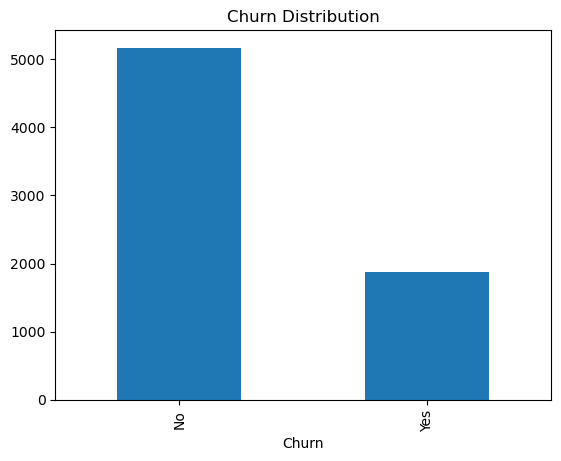

In [5]:
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.show()

### Tenure vs Churn

In [6]:
df.groupby("Churn")["tenure"].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

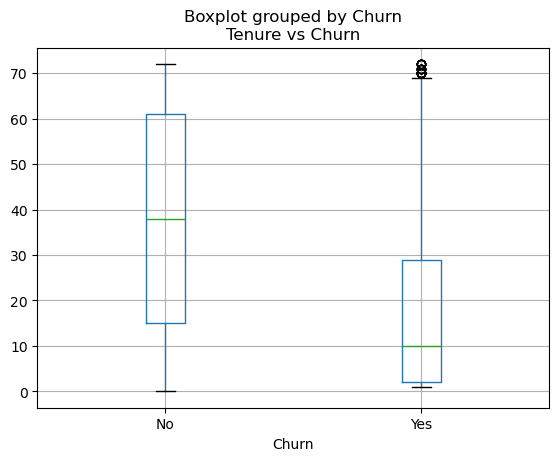

In [7]:
df.boxplot(column="tenure", by="Churn")
plt.title("Tenure vs Churn")
plt.show()

### MonthlyCharges vs Churn

In [8]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

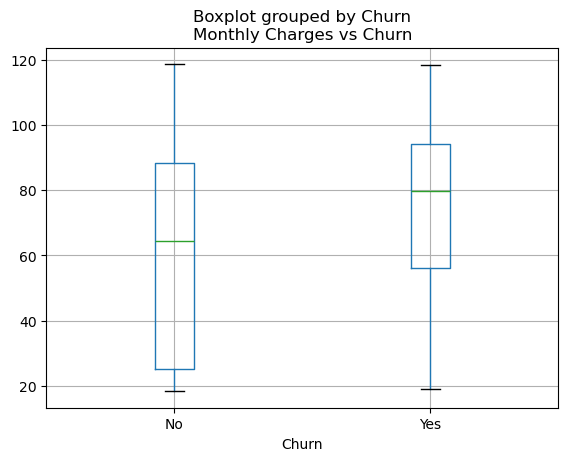

In [9]:
df.boxplot(column="MonthlyCharges", by="Churn")
plt.title("Monthly Charges vs Churn")
plt.show()

### Contract Type vs Churn

In [10]:
pd.crosstab(df["Contract"], df["Churn"])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


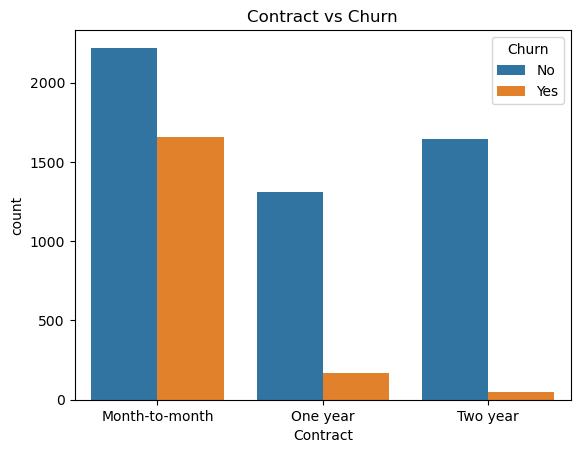

In [11]:
import seaborn as sns

sns.countplot(x="Contract", hue="Churn", data=pd.read_csv("data/Telco_Customer_Churn.csv"))
plt.title("Contract vs Churn")
plt.show()

### Internet Service vs Churn

In [12]:
pd.crosstab(df["InternetService"], df["Churn"])

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


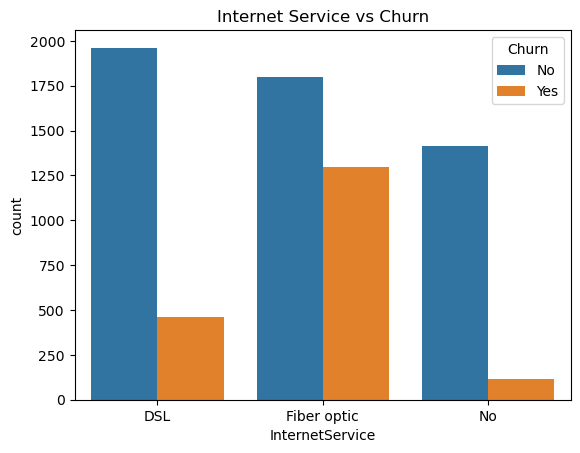

In [13]:
import seaborn as sns

sns.countplot(x="InternetService", hue="Churn", data=pd.read_csv("data/Telco_Customer_Churn.csv"))
plt.title("Internet Service vs Churn")
plt.show()

## 3. Data Cleaning & Preprocessing

In [14]:
import pandas as pd

df = pd.read_csv("data/Telco_Customer_Churn.csv")

### Target Encode

In [15]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

### Drop unnecessary column

In [16]:
df.drop("customerID", axis=1, inplace=True)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Categorical Encoding

In [18]:
df = pd.get_dummies(df, drop_first=True)

### Feature / Target split

In [19]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

## Train–Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state= 42,
    stratify = y
)

## FEATURE SCALING

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## MODEL TRAINING

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

### Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

### XGBoost

In [25]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

## MODEL EVALUATION

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression
[[906 129]
 [186 188]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.59      0.50      0.54       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [28]:
print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
[[945  90]
 [200 174]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.47      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [29]:
print("Gradient Boosting")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting
[[937  98]
 [193 181]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [30]:
print("XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost
[[920 115]
 [181 193]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



## THRESHOLD TUNING (ONLY XGBOOST)

In [31]:
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

In [32]:
threshold = 0.3
y_pred_thresh = (y_prob_xgb >= threshold).astype(int)

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[782 253]
 [ 94 280]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.53      0.75      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.75      0.77      1409



- Final Model: XGBoost Classifier  
- Threshold: 0.3  
- Reason: High churn recall (75%) with acceptable accuracy (75%)

## MODEL SAVE

In [33]:
import pickle

with open("final_xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

### Load Model (Future use)

In [36]:
# Load saved model
with open("final_xgb_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("✅ Model loaded successfully!")

✅ Model loaded successfully!


## ROC–AUC Curve

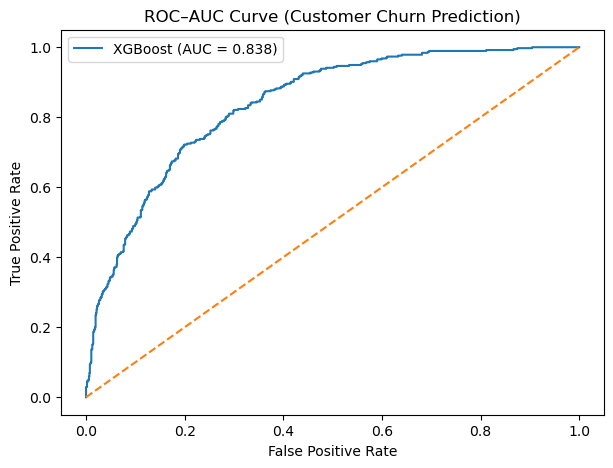

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict churn probability
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
auc_score = roc_auc_score(y_test, y_prob_xgb)

# Plot
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve (Customer Churn Prediction)")
plt.legend()
plt.show()

- The ROC–AUC curve shows that the XGBoost model can effectively
distinguish between churn and non-churn customers.
- An AUC score above 0.82 indicates strong model performance.

## Feature Importance Plot

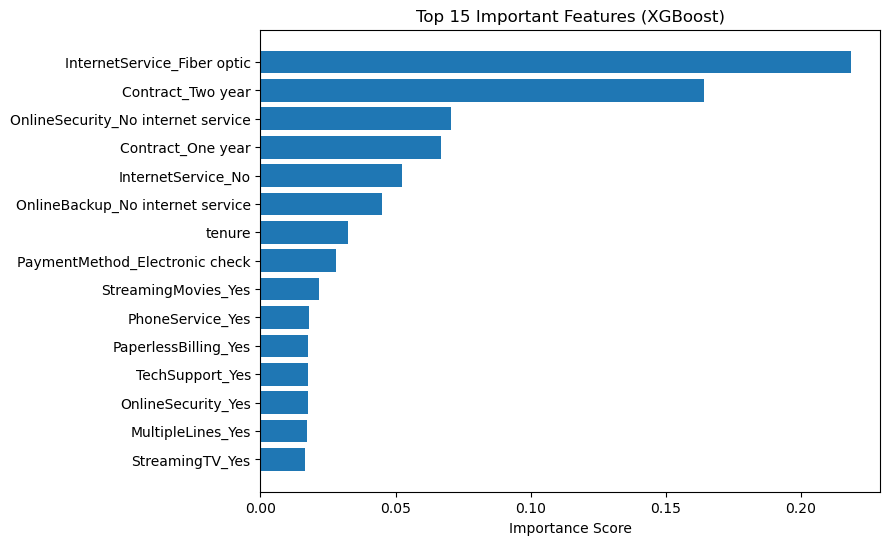

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Create importance dataframe
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb.feature_importances_
})

# Sort and select top 15
feature_importance = feature_importance.sort_values(
    by="Importance", ascending=False
).head(15)

# Plot
plt.figure(figsize=(8,6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 15 Important Features (XGBoost)")
plt.show()

These insights can help the business design targeted retention strategies,
such as offering long-term contracts, improving fiber optic service
quality, and promoting security or support services to high-risk customers.

## Prediction Function

In [37]:
import numpy as np

def predict_churn(model, input_data, threshold=0.3):
    """
    Predict churn based on trained model and threshold
    
    Parameters:
    model: trained ML model
    input_data: pandas DataFrame (single customer)
    threshold: decision threshold
    
    Returns:
    prediction label & probability
    """
    
    # Get probability of churn (class 1)
    churn_prob = model.predict_proba(input_data)[:, 1][0]
    
    # Apply threshold
    prediction = 1 if churn_prob >= threshold else 0
    
    return {
        "Churn Probability": round(churn_prob, 3),
        "Predicted Class": prediction,
        "Prediction Label": "Churn" if prediction == 1 else "No Churn"
    }

## Example Prediction (Demo)

In [41]:
# Take one sample from test data
sample_customer = X_test.iloc[[0]]

result = predict_churn(loaded_model, sample_customer, threshold=0.3)
result

{'Churn Probability': np.float32(0.004),
 'Predicted Class': 0,
 'Prediction Label': 'No Churn'}